In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from copy import deepcopy
from sys import getsizeof
from time import time
from typing import Callable, Tuple, Any

## Compression rates analysis

In [3]:
def get_compression_rates(data: np.ndarray, compression_func: Callable,
                               decompression_func: Callable, func_class: object = None) -> Tuple[int, float]:
    start_time = time()
    if func_class is not None:
        func_class_con = func_class(data)
        compression_func, decompression_func = func_class_con.encode, func_class_con.decode
        compressed_data = compression_func()
    else:
        compressed_data = compression_func(deepcopy(data))

    if compression_func in [compress, lzw_compress]:
        if isinstance(compressed_data, tuple):
            compressed_size = getsizeof(list(compressed_data[0]))
        else:
            compressed_size = getsizeof(list(compressed_data))
    else:
        compressed_size = len(compressed_data[0])
    compressed_time = time() - start_time
    # assert list(img) == list(decompress(compressed_data)) # lossless comprerssion check

    return (compressed_size, compressed_time)

In [4]:
from src.lzw import lzw_compress, lzw_decompress
from src.lz77 import compress, decompress
from src.Huffman_algo import HuffmanCode
from src.deflate import Deflate

# available function for compression
FUNCTION_PAIRS = {'lzw': (lzw_compress, lzw_decompress, None),
                  'lz77': (compress, decompress, None),
                  'deflate': (Deflate().encode, Deflate().decode, None),
                  'huffman': (None, None, HuffmanCode)}

In [5]:
def data_type_test(data: Any):
    res = []
    for encoding_algo in FUNCTION_PAIRS:
        iter_data = deepcopy(data)
        encoding_func, decoding_func, func_obj = FUNCTION_PAIRS[encoding_algo]
        compressed_size, compressed_time = get_compression_rates(iter_data, encoding_func, decoding_func, func_obj)
        print(f'{encoding_algo}: Size of compressed data: {compressed_size}, Time of compression: {compressed_time}')
        res.append((encoding_algo, compressed_size, compressed_time))
        
    # res.append(('huffman', Huffman_code))
        
    return res

In [6]:
def plot_test_data(data, data_type):
    print(f'Size of test {data_type} is {getsizeof(list(data))}')
    rates = data_type_test(data)
    column_names = [elm[0] for elm in rates]
    data_sizes = [elm[1] for elm in rates]
    sns.barplot(x=column_names, y=data_sizes)
    plt.show()

    # in comparisson with raw text
    rates.insert(0, (f'raw {data_type}', getsizeof(list(data)), None))
    column_names = [elm[0] for elm in rates]
    data_sizes = [elm[1] for elm in rates]
    sns.barplot(x=column_names, y=data_sizes)
    plt.show()


# Tests

Size of test one sentence is 248
lzw: Size of compressed data: 184, Time of compression: 0.0003483295440673828
lz77: Size of compressed data: 144, Time of compression: 0.0005590915679931641
deflate: Size of compressed data: 107, Time of compression: 0.0012180805206298828
huffman: Size of compressed data: 59, Time of compression: 0.00018477439880371094


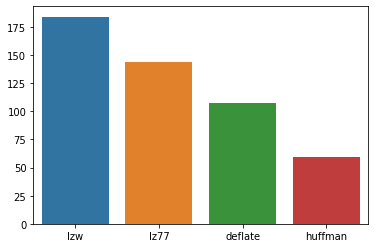

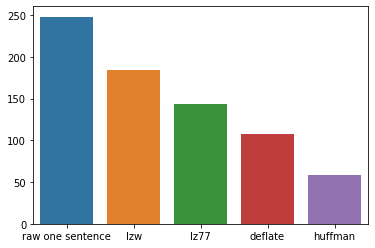

In [7]:
# one sentence
one_sentence = np.array([ord(elm) for elm in 'TOBEORNOTTOBEORTOBEORNOT'])
    
plot_test_data(one_sentence, 'one sentence')

In [8]:
# random testing text
with open('examples/text.txt') as infile:
    text = np.array([ord(char) for char in ''.join(infile.readlines())])

plot_test_data(text, 'text: Romeo and Juliet')

Size of test text: Romeo and Juliet is 1396424
lzw: Size of compressed data: 329064, Time of compression: 0.15063714981079102


KeyboardInterrupt: 

In [ ]:
# random testing image
img = Image.open('examples/test_img_2.png').convert('RGB')
img = np.array(img, dtype='uint8')
img = np.ravel(img)

plot_test_data(img, 'image')

Size of test image is 124416056
lzw: Size of compressed data: 16180456, Time of compression: 25.204736948013306


In [17]:
print(compress(one_sentence))

[( 0, 1, 84) ( 0, 1, 79) ( 0, 1, 66) ( 0, 1, 69) ( 3, 1, 79) ( 0, 1, 82)
 ( 0, 1, 78) ( 6, 1, 79) ( 8, 1, 84) ( 9, 6, 84) (15, 9, 84)]


In [18]:
print(lzw_compress(one_sentence))

[  84   79   66   69   79   82   78   79   84  256  258  260  265  259
  261 7984]


In [23]:
code = HuffmanCode(one_sentence).encode()
print(code)
print(len(code[0]))

('00110111001110101011000011011100111010011011100111010101100', {84: '00', 78: '010', 66: '011', 69: '100', 82: '101', 79: '11'})
59


In [21]:
code = Deflate().encode(one_sentence)
print(code)
print(len(code[0]))

('11110010111100001111001110111100111111000100001111011001111101101000111000011011100100110001101000100110010', {79: '000', 15: '0010', 6: '0011', 84: '010', 9: '0110', 66: '01110', 69: '01111', 1: '10', 3: '11000', 82: '11001', 78: '11010', 8: '11011', 0: '111'})
107
